# Vamos ver como criar o alpha de um portfólio e como vizualizar o mesmo em um gráfico:

In [10]:
#Bibliotecas Necessárias:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Vamos criar uma função da rentabilidade acumulada que será necessária para o cálculo do alpha:

In [11]:
def calculo_rentabilidade_acumulada():
    rentabilidade_acumulada = data['Adj Close']
    for x in np.arange(1, len(data['Adj Close'])):
        rentabilidade_acumulada[x]=((data['Adj Close'][x]-data['Adj Close'][0])/data['Adj Close'][0])*100
    rentabilidade_acumulada[0] = np.nan
    return rentabilidade_acumulada

In [12]:
# vamos definir as ações e seus respectivos pesos em nossa carteira:
carteira=[('itub4.sa', 10), ('petr3.sa', 15), ('vale3.sa', 5), ('meli34.sa', 20), ('wege3.sa', 15), ('mglu3.sa', 15), ('smal11.sa', 20)]
#benchmark ao qual a carteira será comparada:
benchmark_ticker='^bvsp'
#se deixar a data inicial em branco ele irá buscar a data mais antiga disponível
data_inicial = "20/01/2019"
#se deixar a data final em branco ele irá buscar a data mais recente disponível
data_final = "20/01/2020"

### Vamos criar uma tabela dataframe dos valores da carteira para facilitar sua manipulação:

In [13]:
carteira = pd.DataFrame(carteira, columns=['ativo', 'peso'], index=np.arange(len(carteira)))
#vamos observar o resultado:
print(carteira)

       ativo  peso
0   itub4.sa    10
1   petr3.sa    15
2   vale3.sa     5
3  meli34.sa    20
4   wege3.sa    15
5   mglu3.sa    15
6  smal11.sa    20


In [14]:
rentabilidade_acumulada_total=pd.DataFrame()
rentabilidade_acumulada_ponderada_total=pd.DataFrame()
alpha_de_portfolio=pd.DataFrame()

for x in np.arange(len(carteira['ativo'])):
    data = web.DataReader(carteira['ativo'][x], 'yahoo', start=data_inicial, end=data_final)

    rentabilidade_acumulada=calculo_rentabilidade_acumulada()
    rentabilidade_acumulada_total[str(carteira['ativo'][x])]=rentabilidade_acumulada

    rentabilidade_acumulada_ponderada=rentabilidade_acumulada.mul(int(carteira['peso'][x])/100)
    rentabilidade_acumulada_ponderada_total[str(carteira['ativo'][x])]=rentabilidade_acumulada_ponderada

    #print(rentabilidade_acumulada)
    alpha_de_portfolio[str(carteira['ativo'][x])]=rentabilidade_acumulada_ponderada
rentabilidade_acumulada_total['total']=rentabilidade_acumulada_total.sum(axis=1)
alpha_de_portfolio['total']=alpha_de_portfolio.sum(axis=1)



ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Rentabilidade individual de cada ativo:

In [15]:
print("--------------------------------------------------------------------")
print(rentabilidade_acumulada_total)

--------------------------------------------------------------------
            itub4.sa   petr3.sa   vale3.sa  meli34.sa    wege3.sa    mglu3.sa  \
Date                                                                            
2019-01-21       NaN        NaN        NaN        NaN         NaN         NaN   
2019-01-22 -0.160619  -1.502224  -0.361790        NaN   -1.381497   -2.964071   
2019-01-23  0.508726  -0.477982   0.669326        NaN   -0.265651    1.556897   
2019-01-24  0.374852   0.580394   1.573808        NaN    0.000000    0.287425   
2019-01-28  2.168688  -2.970306 -23.371923        NaN    1.594049    0.227562   
...              ...        ...        ...        ...         ...         ...   
2020-01-14 -1.319655  10.509352   3.318317  11.548597   88.886684  159.962803   
2020-01-15 -2.529961   8.044323   2.984074  12.681213   90.127958  158.325979   
2020-01-16 -2.332911   8.391504   2.445569  16.144974   93.581842  157.363168   
2020-01-17 -1.657407  10.578774   5.8437

### Rentabilidade PONDERADA (de acordo com o peso) de cada ativo:

In [16]:
print("--------------------------------------------------------------------")
print(alpha_de_portfolio)

--------------------------------------------------------------------
            itub4.sa  petr3.sa  vale3.sa  meli34.sa   wege3.sa   mglu3.sa  \
Date                                                                        
2019-01-21       NaN       NaN       NaN        NaN        NaN        NaN   
2019-01-22 -0.016062 -0.225334 -0.018090        NaN  -0.207225  -0.444611   
2019-01-23  0.050873 -0.071697  0.033466        NaN  -0.039848   0.233535   
2019-01-24  0.037485  0.087059  0.078690        NaN   0.000000   0.043114   
2019-01-28  0.216869 -0.445546 -1.168596        NaN   0.239107   0.034134   
...              ...       ...       ...        ...        ...        ...   
2020-01-14 -0.131965  1.576403  0.165916   2.309719  13.333003  23.994420   
2020-01-15 -0.252996  1.206648  0.149204   2.536243  13.519194  23.748897   
2020-01-16 -0.233291  1.258726  0.122278   3.228995  14.037276  23.604475   
2020-01-17 -0.165741  1.586816  0.292186   4.299834  14.790127  24.247157   
2020-01

### Agora vamos calcular a rentabilidade do benchmark:

In [17]:
benchmark=web.DataReader(benchmark_ticker, 'yahoo', start=data_inicial, end=data_final)
for x in np.arange(1, len(benchmark['Adj Close'])):
        rentabilidade_acumulada[x]=((benchmark['Adj Close'][x]-benchmark['Adj Close'][0])/benchmark['Adj Close'][0])*100
rentabilidade_acumulada[0] = np.nan
alpha_benchmark=rentabilidade_acumulada

### Vamos visualizar os dados no gráfico:

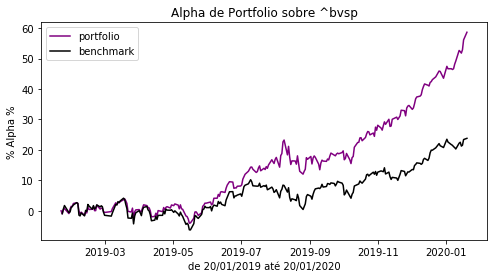

In [18]:
plt.figure(figsize=(8,4))
plt.title('Alpha de Portfolio sobre ' + str(benchmark_ticker))
plt.xlabel("de " + data_inicial + " até " + data_final)
plt.ylabel("% Alpha %")
plt.plot(alpha_de_portfolio['total'], color='purple', label='portfolio')
plt.plot(alpha_benchmark, color='black', label='benchmark')
plt.legend()